In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Annoying

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()

In [2]:
'''
Rough plan

Look at cook times and preptimes, create column with those combined
Separate by course
State and region are probably not necessary at all, why did I bother fixing that data?
Find the most commonly used ingredients, maybe do some web scraping to find the cost of those ingredients, or just the top % of them.
Make separate data for non-vegetarian dishes, use common ingredients separately for this, meat is expensive.
'''


'\nRough plan\n\nLook at cook times and preptimes, create column with those combined\nSeparate by course\nState and region are probably not necessary at all, why did I bother fixing that data?\nFind the most commonly used ingredients, maybe do some web scraping to find the cost of those ingredients, or just the top % of them.\nMake separate data for non-vegetarian dishes, use common ingredients separately for this, meat is expensive.\n'

## Exploratory data analysis
For this dataset I have decided on a few things that I want to look at in order to find proper dishes for the restaurant. For the menu I want the food to be easily digestable for me, except for a few dishes, just because some of the things I can't digest are still delicious, like dal. I want the menu to be smaller than normal, like 15 dishes or less, maybe half being meat, a couple snacks, desserts and the rest being vegetarian dishes.
1. Cook time and prep time. The length of time it takes to make a dish is important, the faster the better, but you can't always choose speed in cooking, sometimes you have to take your time.
2. Different dishes in different courses. It makes sense to have a variety of availabilities, main dishes, side dishes, smaller/starter foods, and some desserts and drinks.
3. Commonly used ingredients.
4. Meat dishes. I am a big meat eater, and I have trouble digesting several types of plants as well. I think if I were to have a restaurant, I would like to be able to eat what is on the menu.

In [6]:
df = pd.read_csv('../data/processed_indian_food.csv')
#df = df.drop(['region', 'state'])
df.sample(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
94,khichdi,"moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
224,luchi,"maida, vegetable oil",vegetarian,20,30,neutral/other,main course,west bengal,east
197,mohanthal,"rose water, pistachio, badam, bengal gram flou...",vegetarian,5,45,sweet,dessert,gujarat,west
0,balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,west bengal,east
248,red rice,"red pepper, red onion, butter, watercress, oli...",vegetarian,10,50,neutral/other,main course,-1,-1
110,panjeeri,"whole wheat flour, musk melon seeds, poppy see...",vegetarian,10,25,sweet,dessert,uttar pradesh,NaN
8,kalakand,"milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,west bengal,east
234,hando guri,"jaggery, raisins",vegetarian,10,60,sweet,dessert,assam,north east
9,kheer,"milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,south
171,bhakri,"jowar flour, sesame seeds",vegetarian,20,25,neutral/other,main course,maharashtra,west


In [7]:
all_ingredients = [', '.join(list(df['ingredients'])).split(', ')]

df['ingredients'] = df['ingredients'].map(lambda i: i.split(', '))
df['ingredients']

0                      [maida flour, yogurt, oil, sugar]
1                              [gram flour, ghee, sugar]
2         [carrots, milk, sugar, ghee, cashews, raisins]
3      [flour, ghee, kewra, milk, clarified butter, s...
4      [milk powder, plain flour, baking powder, ghee...
                             ...                        
250            [glutinous rice, black sesame seeds, gur]
251    [coconut milk, egg yolks, clarified butter, al...
252    [cottage cheese, dry dates, dried rose petals,...
253    [milk powder, dry fruits, arrowroot powder, al...
254    [brown rice, fennel seeds, grated coconut, bla...
Name: ingredients, Length: 255, dtype: object

Creating a new column to display the total time it takes to cook a dish. While the separate times are useful, especially with certain items taking a much longer time in prep (marinating) than in cooking.

In [8]:
df['total_time'] = df['prep_time'] + df['cook_time']
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,balu shahi,"[maida flour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,west bengal,east,70
1,boondi,"[gram flour, ghee, sugar]",vegetarian,80,30,sweet,dessert,rajasthan,west,110
2,gajar ka halwa,"[carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,punjab,north,75
3,ghevar,"[flour, ghee, kewra, milk, clarified butter, s...",vegetarian,15,30,sweet,dessert,rajasthan,west,45
4,gulab jamun,"[milk powder, plain flour, baking powder, ghee...",vegetarian,15,40,sweet,dessert,west bengal,east,55


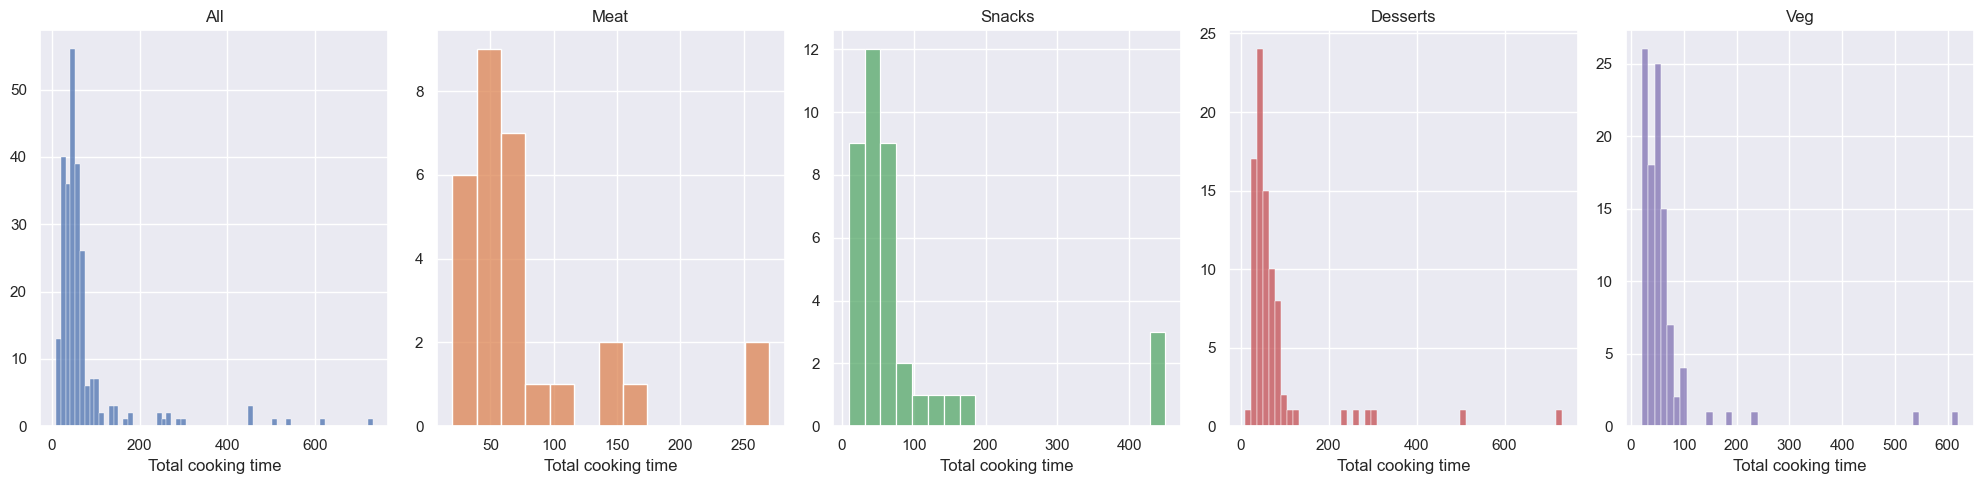

In [9]:
fig, ax = plt.subplots(1, 5, figsize = (20, 5))
data_ = [
    df, 
    df[df['diet'] == 'non vegetarian'],
    df[df['course'] == 'snack'],
    df[df['course'] == 'dessert'],
    df[(df['course'] == 'main course') & (df['diet'] == 'vegetarian')]
]
names = ['All', 'Meat', 'Snacks', 'Desserts', 'Veg']
colors = sns.color_palette('deep', 5)
for i in range(0, 5):      
    sns.histplot(data = data_[i], x = 'total_time', ax = ax[i], color = colors[i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Total cooking time')
    ax[i].set_title(names[i])
plt.tight_layout()
fig.savefig('../figures/food_time.png')

In [11]:
sorted_by_time = df.sort_values(by = 'total_time', ascending = True, inplace = False)
fast_desserts = sorted_by_time[sorted_by_time['course'] == 'dessert'].head(10).reset_index(drop = True)
fast_meat = sorted_by_time[sorted_by_time['diet'] == 'non vegetarian'].head(10).reset_index(drop = True)
fast_veg = sorted_by_time[(sorted_by_time['diet'] == 'vegetarian') & (sorted_by_time['course'] == 'main course')].head(10).reset_index(drop = True)
fast_snacks = sorted_by_time[sorted_by_time['course'] == 'snack'].head(10).reset_index(drop = True)
fastest_foods = pd.DataFrame({
    'fast_desserts': fast_desserts['name'],
    'fast_meat': fast_meat['name'],
    'fast_veg': fast_veg['name'],
    'fast_snacks': fast_snacks['name']
})
fastest_foods

,fast_desserts,fast_meat,fast_veg,fast_snacks
0,lassi,galho,keri no ras,papadum
1,pongal,alu pitika,khorisa,papad
2,mysore pak,kumol sawul,bajri no rotlo,khichu
3,modak,masor koni,chapati,pani puri
4,unni appam,bilahi maas,pakhala,chorafali
5,sheer korma,bombil fry,koshimbir,dhokla
6,qubani ka meetha,masor tenga,dalithoy,upma
7,sukhdi,kolim jawla,kootu,uttapam
8,gud papdi,chicken varuval,aloo tikki,khaman
9,kuzhi paniyaram,chingri bhape,currivepillai sadam,kombdi vade


In [ ]:
all_ingredients = all_ingredients[0]
all_ingredients

In [ ]:
all_ingredients = pd.Series(all_ingredients)
all_ingredients = all_ingredients.value_counts()

In [ ]:
all_ingredients.head(25)

In [ ]:
meat_dishes = df[df['diet'] == 'non vegetarian']
meat_dishes

In [ ]:
df['course'].value_counts()

In [ ]:
df['course'][df['course'] == 'starter'] = 'snack'
df['course'].value_counts()

In [ ]:
non_meat_main_courses = df[(df['course'] == 'main course') & (df['diet'] == 'vegetarian')]
non_meat_main_courses

In [ ]:
desserts = df[df['course'] == 'dessert']
snacks = df[df['course'] == 'snack']
snacks.head()

In [ ]:
desserts.head()